In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

In [43]:
wine_df = pd.read_csv('wine.csv')

In [44]:
#Drop Duplicates
wine_df.drop_duplicates(inplace=True)
#It does not appear there are dumplicate columns to begin with but for the sake of the assignment.

In [45]:
#There are no errors in the column data other than the ? and NA values. Those are addressed below.

In [46]:
#Identify Outliers
def find_outliers_iqr(df):
    for column in df.columns:
        if df[column].dtype != 'object':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            print(f"Outliers in {column}:", outliers[column].values)

find_outliers_iqr(wine_df)

Outliers in rating: [4.9 4.9]
Outliers in num_reviews: [ 1793  1705  1309  1209  1201 12421  5266  4350  3929  3437  3164  3127
  2935  2826  2765  2480  2419  2177  1892  1199  1141  6803  5938  5545
  5116  4747  4685  4516  3383  3239  2416  2208  1608  1363  7529  7435
  7237  5863  5372  5365  4979  4935  4411  3521  3443  3148  3118  2887
  2858  2712  2710  2551  2530  2228  2220  2207  2144  1910  1864  1520
  1503  1393  1346  1345  1236  1192  1163  1148  6395  5732  5614  5204
  5109  4851  4625  4357  4121  3589  3456  3406  3327  3197  3095  3093
  3089  2546  2418  2370  2228  2133  2080  2053  1993  1949  1948  1943
  1853  1842  1777  1701  1561  1519  1514  1475  1463  1438  1372  1339
  1326  1269  1266  1255  1226  1172  1166  1158 10273  9092  7401  7293
  6521  6345  5152  4994  4767  4457  4266  4023  3997  3829  3660  3620
  3608  3587  3524  2990  2936  2923  2911  2844  2783  2705  2575  2453
  2423  2341  2295  2241  2241  2062  2013  1924  1914  1884  1846  1

In [47]:
# Replace '?' with NaN for numerical columns
def replace_question_marks_with_nan(df):
    for column in df.select_dtypes(include=np.number).columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

replace_question_marks_with_nan(wine_df)

# Fill NaN values with the mean of the respective columns
def fill_na_with_mean(df):
    for column in df.select_dtypes(include=np.number).columns:
        df[column].fillna(df[column].mean(), inplace=True)

fill_na_with_mean(wine_df)

In [48]:
#The capital gain and loss columns in the adult.csv I left the 0's as it is a possibility that someone did not invest and therefore would have a 0 in those columns.

In [49]:
#The target for wine.csv is the rating, and for adult.csv it is the classification of their income as the target. Below we will see the visu

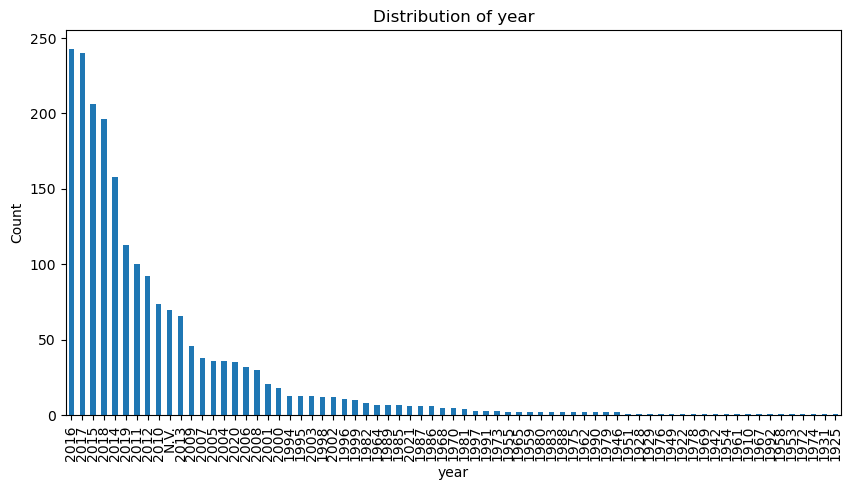

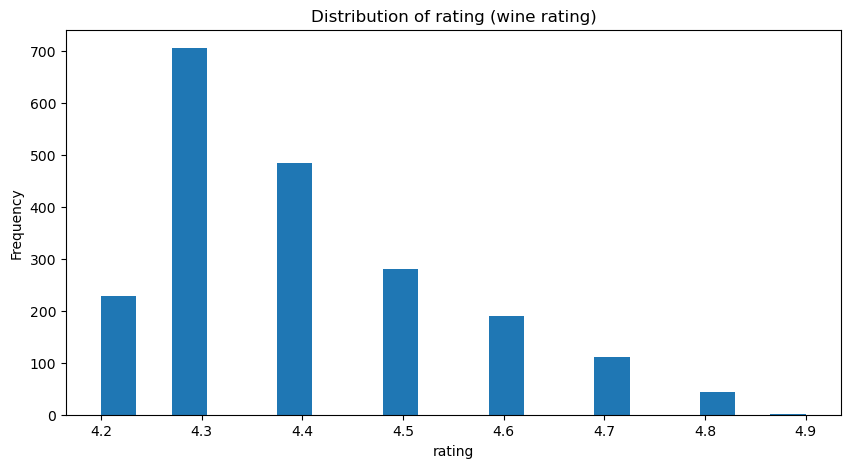

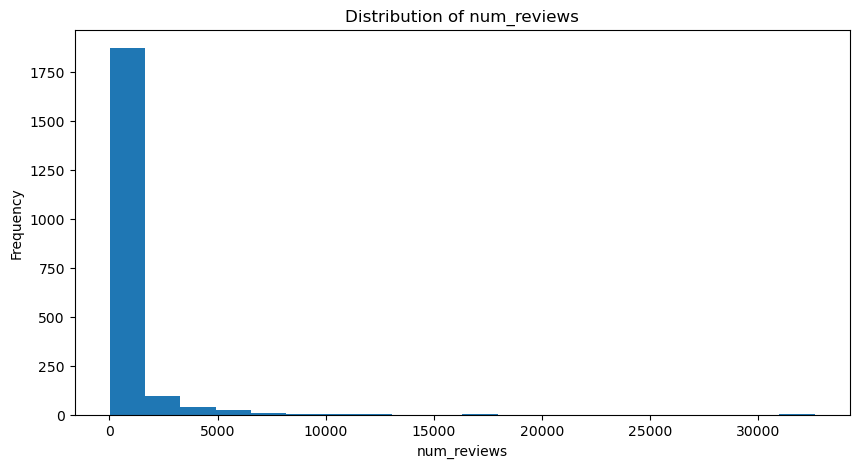

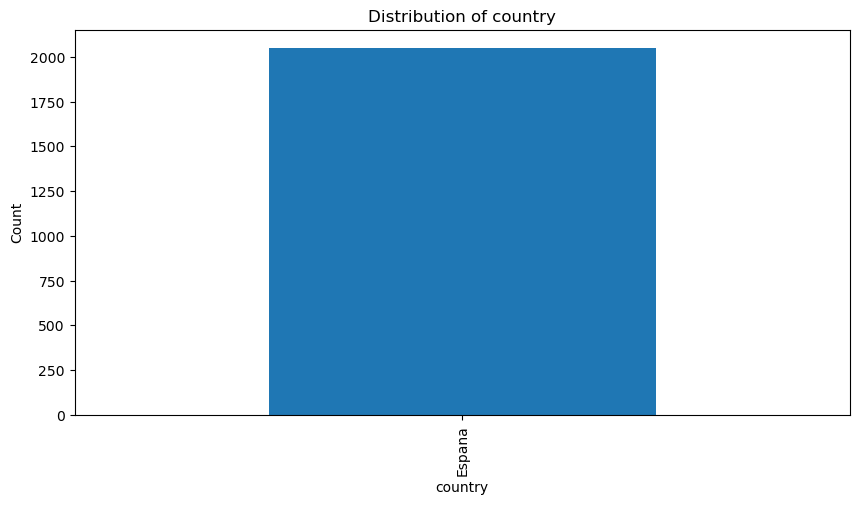

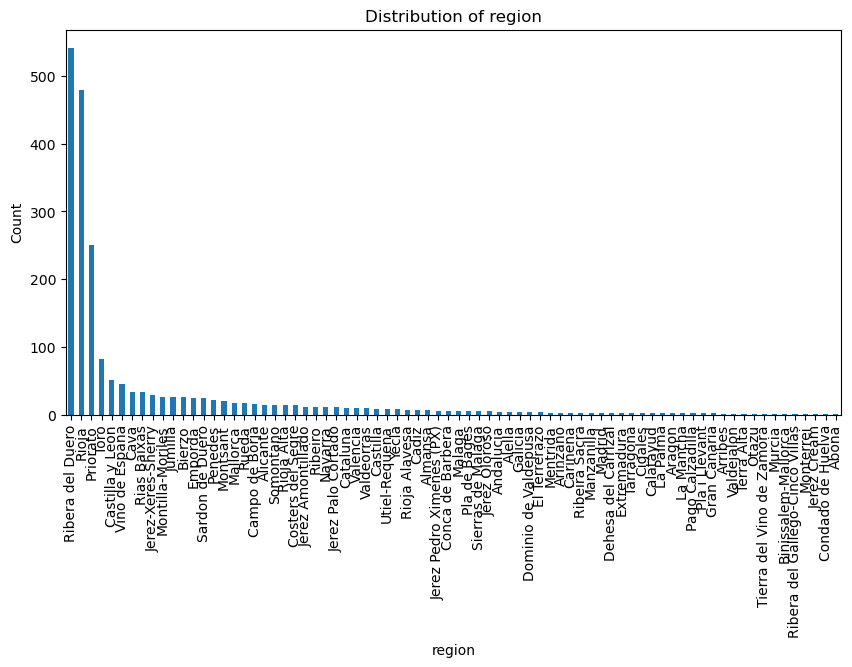

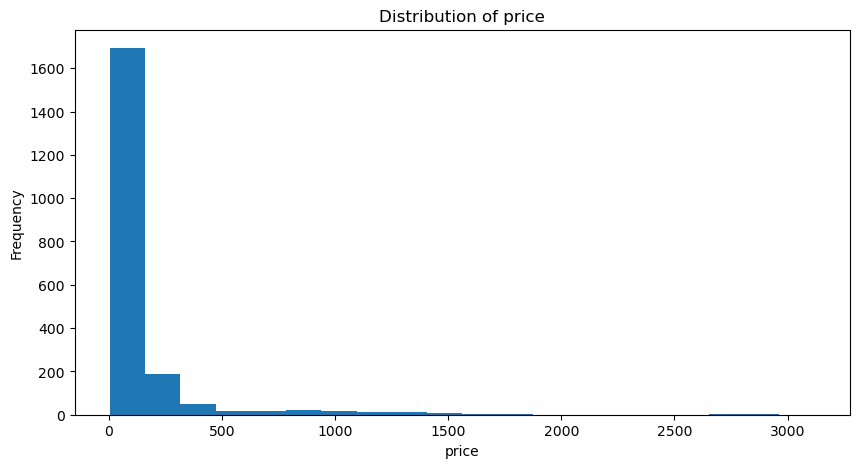

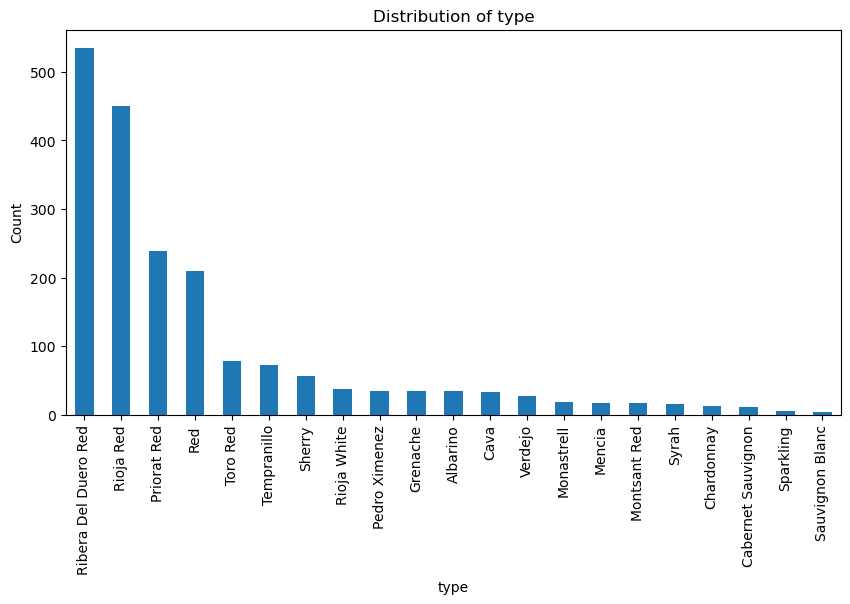

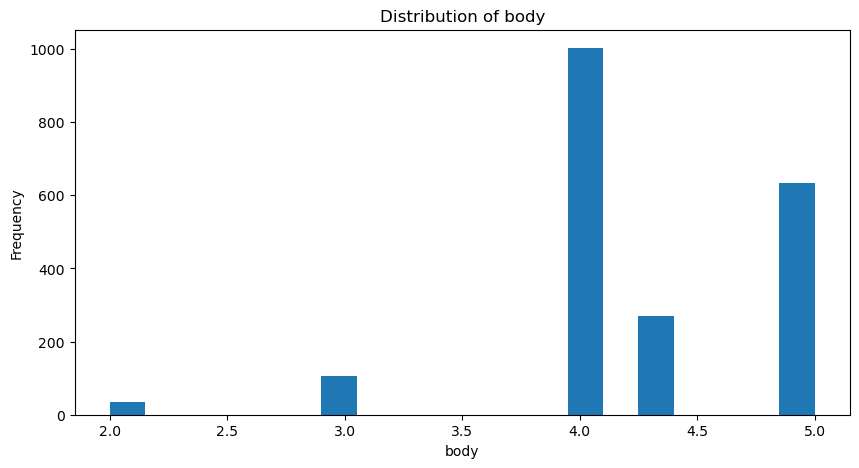

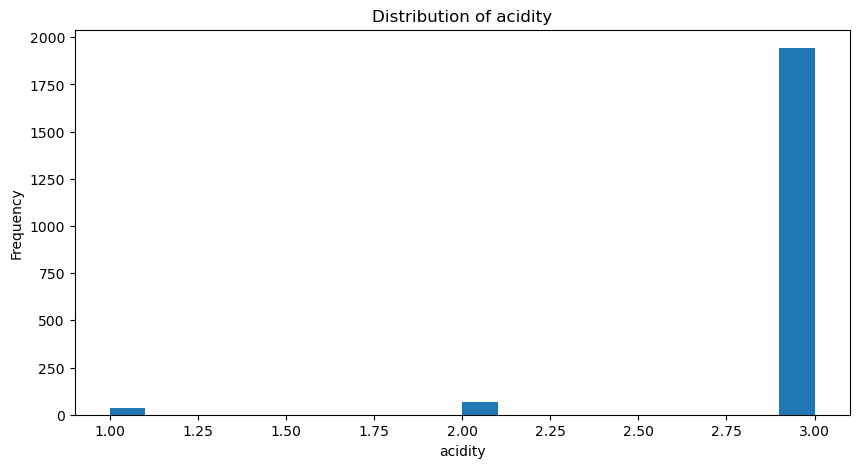

In [50]:
target_wine = 'rating'

for column in wine_df.columns[2:]:
    plt.figure(figsize=(10, 5))
    if column == target_wine:
        plt.title(f"Distribution of {column} (wine rating)")
    else:
        plt.title(f"Distribution of {column}")
        
    if wine_df[column].dtype == 'object':
        wine_df[column].value_counts().plot(kind='bar')
        plt.xlabel(column)
        plt.ylabel("Count")
    else:
        wine_df[column].plot(kind='hist', bins=20)
        plt.xlabel(column)
        plt.ylabel("Frequency")
    plt.show()

In [51]:
#There are no misspellings of data or inconsistencies within the categorical columns and thus cleaning is not needed

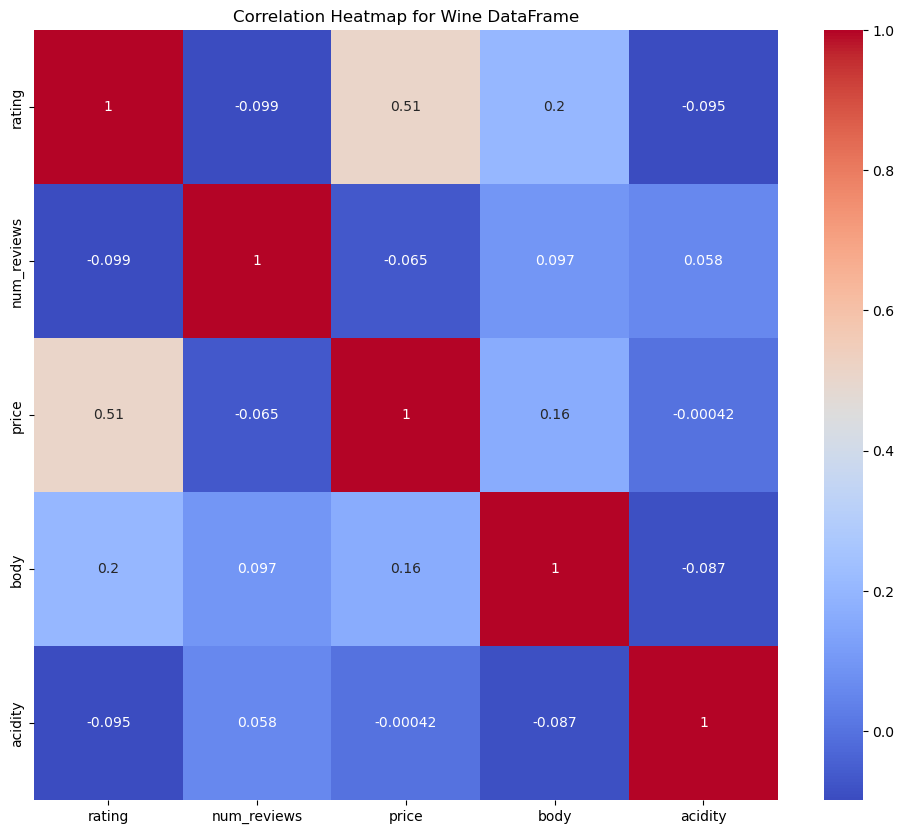

In [52]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Wine DataFrame")
plt.show()

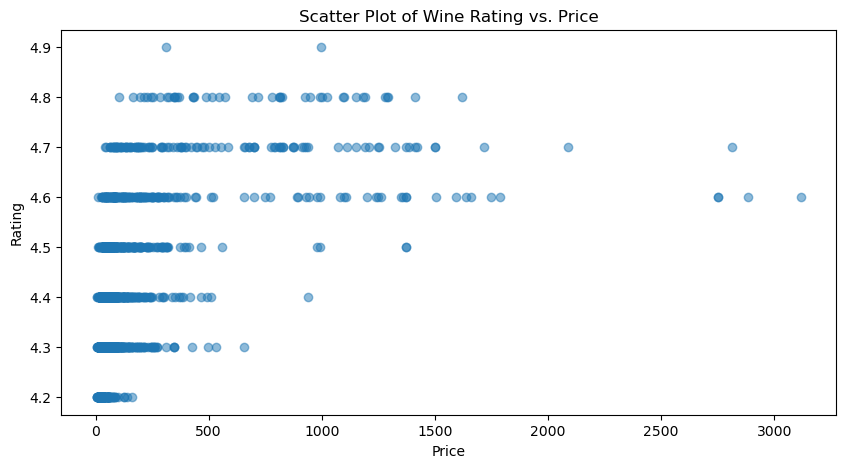

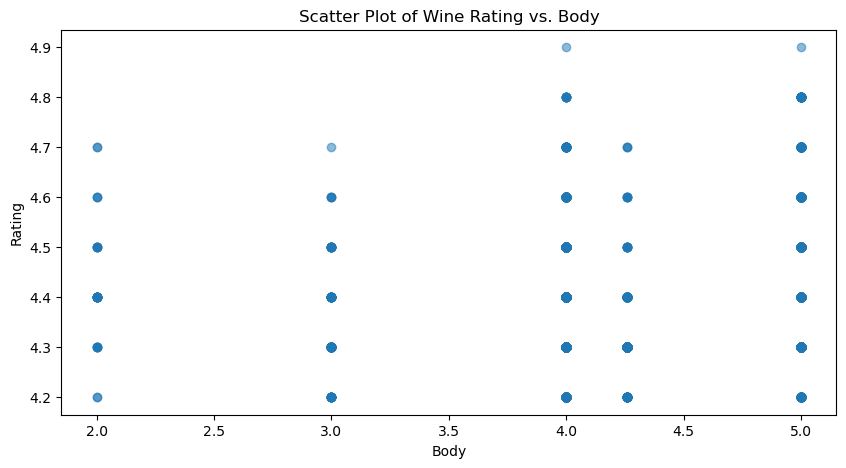

In [53]:
# Scatter plot of rating vs. price
plt.figure(figsize=(10, 5))
plt.scatter(wine_df['price'], wine_df['rating'], alpha=0.5)
plt.title("Scatter Plot of Wine Rating vs. Price")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

# Scatter plot of body vs. rating
plt.figure(figsize=(10, 5))
plt.scatter(wine_df['body'], wine_df['rating'], alpha=0.5)
plt.title("Scatter Plot of Wine Rating vs. Body")
plt.xlabel("Body")
plt.ylabel("Rating")
plt.show()

In [54]:
#The price vs rating is correlated at .51 meaning it is reasonably correlated. The heatmap above and the plot above show this fact.
#The rating vs body is also correlated higher than the other columns at .2 

In [77]:
#Create a pipeline for data preprocessing
numerical_features = wine_df.drop(target_wine, axis=1).select_dtypes(include=[np.number]).columns
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('pca', PCA(n_components=0.95))
])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features)])

In [78]:
#Split the dataset into training and testing sets
X = wine_df.drop(target_wine, axis=1)
y = wine_df[target_wine]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
#Train different models using GridSearchCV for hyperparameter tuning
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=1000)
}

params = {
    'Linear Regression': {},
    'Decision Tree': {'model__max_depth': [3, 6, 9, 12]},
    'Random Forest': {'model__n_estimators': [10, 50, 100], 'model__max_depth': [3, 6, 9]},
    'MLP Regressor': {'model__hidden_layer_sizes': [(10,), (20,), (50,)], 'model__alpha': [0.0001, 0.001, 0.01]}
}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    grid = GridSearchCV(pipeline, param_grid=params[model_name], cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    models[model_name] = grid

In [80]:
#Evaluate models using Mean Squared Error (MSE) and R2 score
for model_name, model in models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f"{model_name}:")
    print(f"  Train MSE: {mse_train:.2f}, R2: {r2_train:.2f}")
    print(f"  Test MSE: {mse_test:.2f}, R2: {r2_test:.2f}")
    print(f"  Best parameters: {model.best_params_}")
    print()

Linear Regression:
  Train MSE: 0.02, R2: 0.30
  Test MSE: 0.02, R2: 0.19
  Best parameters: {}

Decision Tree:
  Train MSE: 0.01, R2: 0.43
  Test MSE: 0.01, R2: 0.33
  Best parameters: {'model__max_depth': 3}

Random Forest:
  Train MSE: 0.01, R2: 0.64
  Test MSE: 0.01, R2: 0.46
  Best parameters: {'model__max_depth': 6, 'model__n_estimators': 50}

MLP Regressor:
  Train MSE: 0.02, R2: 0.18
  Test MSE: 0.06, R2: -1.77
  Best parameters: {'model__alpha': 0.001, 'model__hidden_layer_sizes': (50,)}



In [ ]:
#I have decided to choose the Random Forest Model for production, here is why
#Test R2 score: The Random Forest model has the highest R2 score on the test set (0.46) compared to the other models. This indicates that the Random Forest model explains 46% of the variance in the target variable, which is better than Linear Regression (0.19), Decision Tree (0.33), and MLP Regressor (-1.77).
#Test MSE: The Random Forest model has the lowest Mean Squared Error (MSE) on the test set (0.01). A lower MSE indicates better performance, and this suggests that the Random Forest model makes the smallest average error in its predictions.
#Model complexity: Random Forest is an ensemble model, which means it combines the predictions of multiple decision trees. This approach helps mitigate the risk of overfitting and generally results in better generalization performance.
#Considering these factors, the Random Forest model appears to be the best choice for this particular problem. It offers the best balance between performance on the test set and model complexity.